In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        x = dataset[i:(i+look_back)]
        dataX.append(x)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
np.random.seed(0)
df = read_csv('international-airline-passengers.csv', usecols = [1], engine = 'python', skipfooter = 3)
dataset = df.values.astype('float32')

In [4]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train = dataset[0:train_size, :]
test = dataset[train_size:, :]

look_back = 3
train_X, train_Y = create_dataset(train, look_back)
test_X, test_Y = create_dataset(test, look_back)

train_X = train_X.reshape((train_X.shape[0], 1, look_back))
test_X = test_X.reshape((test_X.shape[0], 1, look_back))

In [5]:
train_X.shape

(92, 1, 3)

In [6]:
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(train_X, train_Y, epochs = 30, batch_size = 1, verbose = 2)

Epoch 1/30
2s - loss: 0.0526
Epoch 2/30
0s - loss: 0.0250
Epoch 3/30
0s - loss: 0.0157
Epoch 4/30
0s - loss: 0.0131
Epoch 5/30
0s - loss: 0.0120
Epoch 6/30
0s - loss: 0.0107
Epoch 7/30
0s - loss: 0.0094
Epoch 8/30
0s - loss: 0.0082
Epoch 9/30
0s - loss: 0.0073
Epoch 10/30
0s - loss: 0.0065
Epoch 11/30
0s - loss: 0.0059
Epoch 12/30
0s - loss: 0.0053
Epoch 13/30
0s - loss: 0.0049
Epoch 14/30
0s - loss: 0.0046
Epoch 15/30
0s - loss: 0.0044
Epoch 16/30
0s - loss: 0.0044
Epoch 17/30
0s - loss: 0.0042
Epoch 18/30
0s - loss: 0.0040
Epoch 19/30
0s - loss: 0.0041
Epoch 20/30
0s - loss: 0.0039
Epoch 21/30
0s - loss: 0.0039
Epoch 22/30
0s - loss: 0.0039
Epoch 23/30
0s - loss: 0.0039
Epoch 24/30
0s - loss: 0.0039
Epoch 25/30
0s - loss: 0.0038
Epoch 26/30
0s - loss: 0.0038
Epoch 27/30
0s - loss: 0.0037
Epoch 28/30
0s - loss: 0.0037
Epoch 29/30
0s - loss: 0.0037
Epoch 30/30
0s - loss: 0.0037


In [7]:
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [8]:
train_Y = scaler.inverse_transform([train_Y])
test_Y = scaler.inverse_transform([test_Y])

In [9]:
train_Y = train_Y.T
train_Y.shape

(92, 1)

In [10]:
test_Y = test_Y.T
test_Y.shape

(44, 1)

In [11]:
trainScore = math.sqrt(mean_squared_error(train_Y, trainPredict))
print (trainScore)
testScore = math.sqrt(mean_squared_error(test_Y, testPredict))
print (testScore)

31.641179514176006
68.56723107068277


In [12]:
print (train_Y[80:85])
print (trainPredict[80:85])

[[ 277.99998951]
 [ 283.99999928]
 [ 277.00000332]
 [ 317.00000669]
 [ 313.00000018]]
[[ 269.81600952]
 [ 266.4463501 ]
 [ 278.45999146]
 [ 284.96887207]
 [ 301.07162476]]


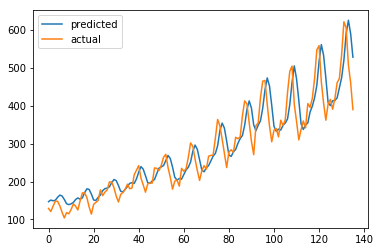

In [13]:
plt.plot(np.append(trainPredict, testPredict), label = 'predicted')
plt.plot(np.append(train_Y, test_Y), label = 'actual')
plt.legend()
plt.show()